In [45]:
import pandas as pd
import numpy as np

In [46]:
#import pandas as pd


#df = pd.read_csv("../data/input/listings.csv.gz", dtype={'neighbourhood_group_cleansed': str})

In [47]:
useful_columns = [
    "id",
    "host_response_time",
    "city",
    "latitude",
    "longitude",
    "beds",
    "price",
]

In [48]:
airbnb_dataframe = pd.read_csv("../data/input/listings.csv.gz", dtype={'city': str} , usecols= useful_columns)

In [49]:
print(airbnb_dataframe['city'].dtype)
print(airbnb_dataframe['city'].head())



object
0       Washington
1       Washington
2      Hyattsville
3       Washington
4    Silver Spring
Name: city, dtype: object


In [50]:
airbnb_dataframe.head()

,id,host_response_time,city,latitude,longitude,beds,price
0,7087327,within a few hours,Washington,38.890046,-77.002808,2.0,$160.00
1,975833,within a day,Washington,38.880413,-76.990485,3.0,$350.00
2,8249488,within a day,Hyattsville,38.955291,-76.986006,1.0,$50.00
3,8409022,within an hour,Washington,38.872134,-77.019639,1.0,$95.00
4,8411173,within a few hours,Silver Spring,38.996382,-77.041541,1.0,$50.00


In [51]:
airbnb_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3723 non-null   int64  
 1   host_response_time  3289 non-null   object 
 2   city                3723 non-null   object 
 3   latitude            3723 non-null   float64
 4   longitude           3723 non-null   float64
 5   beds                3712 non-null   float64
 6   price               3723 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 203.7+ KB


In [52]:
airbnb_dataframe.isna().sum()

id                      0
host_response_time    434
city                    0
latitude                0
longitude               0
beds                   11
price                   0
dtype: int64

In [53]:
useful_columns = [
    "id",
    "host_response_time",
    "city",
    "latitude",
    "longitude",
    "price",
]

In [54]:
airbnb_dataframe[useful_columns]

,id,host_response_time,city,latitude,longitude,price
0,7087327,within a few hours,Washington,38.890046,-77.002808,$160.00
1,975833,within a day,Washington,38.880413,-76.990485,$350.00
2,8249488,within a day,Hyattsville,38.955291,-76.986006,$50.00
3,8409022,within an hour,Washington,38.872134,-77.019639,$95.00
4,8411173,within a few hours,Silver Spring,38.996382,-77.041541,$50.00
...,...,...,...,...,...,...
3718,1544877,within a few hours,Washington,38.885492,-76.987765,$135.00
3719,1806338,within an hour,Washington,38.889401,-76.986646,$79.00
3720,1817907,within an hour,Washington,38.889533,-77.001010,$275.00
3721,4223238,within a day,Washington,38.890815,-77.002283,$179.00


In [55]:
airbnb_dataframe.filter(useful_columns)

,id,host_response_time,city,latitude,longitude,price
0,7087327,within a few hours,Washington,38.890046,-77.002808,$160.00
1,975833,within a day,Washington,38.880413,-76.990485,$350.00
2,8249488,within a day,Hyattsville,38.955291,-76.986006,$50.00
3,8409022,within an hour,Washington,38.872134,-77.019639,$95.00
4,8411173,within a few hours,Silver Spring,38.996382,-77.041541,$50.00
...,...,...,...,...,...,...
3718,1544877,within a few hours,Washington,38.885492,-76.987765,$135.00
3719,1806338,within an hour,Washington,38.889401,-76.986646,$79.00
3720,1817907,within an hour,Washington,38.889533,-77.001010,$275.00
3721,4223238,within a day,Washington,38.890815,-77.002283,$179.00


In [56]:
airbnb_dataframe.loc[:, useful_columns]

,id,host_response_time,city,latitude,longitude,price
0,7087327,within a few hours,Washington,38.890046,-77.002808,$160.00
1,975833,within a day,Washington,38.880413,-76.990485,$350.00
2,8249488,within a day,Hyattsville,38.955291,-76.986006,$50.00
3,8409022,within an hour,Washington,38.872134,-77.019639,$95.00
4,8411173,within a few hours,Silver Spring,38.996382,-77.041541,$50.00
...,...,...,...,...,...,...
3718,1544877,within a few hours,Washington,38.885492,-76.987765,$135.00
3719,1806338,within an hour,Washington,38.889401,-76.986646,$79.00
3720,1817907,within an hour,Washington,38.889533,-77.001010,$275.00
3721,4223238,within a day,Washington,38.890815,-77.002283,$179.00


Univariate Analysis

In [57]:
airbnb_dataframe["host_response_time"].value_counts(normalize=True).mul(100)

host_response_time
within an hour        38.795987
within a few hours    35.238674
within a day          24.049863
a few days or more     1.915476
Name: proportion, dtype: float64

In [58]:
#airbnb_dataframe["host_response_time"] = airbnb_dataframe["host_response_time"].fillna("not mentioned")

In [59]:
airbnb_dataframe = airbnb_dataframe.fillna({'host_response_time': "not mentioned"})

In [60]:
host_response_time = (
    airbnb_dataframe["host_response_time"].value_counts(normalize=True)
                                          .mul(100)
                                          .to_frame()
                                          .reset_index()
                                          .sort_values("proportion")
                                          .assign(
                                              host_response_color=lambda x: np.where(
                                              x["host_response_time"].eq("not mentioned"), "#FF5A5F", "#808080")))

In [61]:
host_response_time

,host_response_time,proportion,host_response_color
4,a few days or more,1.692184,#808080
3,not mentioned,11.657266,#FF5A5F
2,within a day,21.246307,#808080
1,within a few hours,31.130808,#808080
0,within an hour,34.273435,#808080


In [62]:
host_response_time.to_csv("../data/output/host_response_time.csv", index=False)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='host_response_time', ylabel='proportion'>

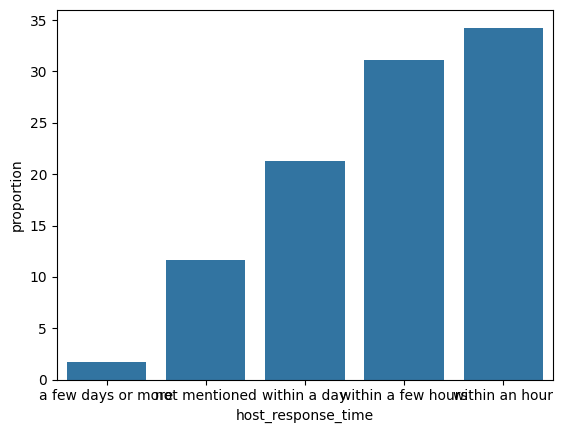

In [64]:
sns.barplot(data=host_response_time, x="host_response_time", y="proportion")

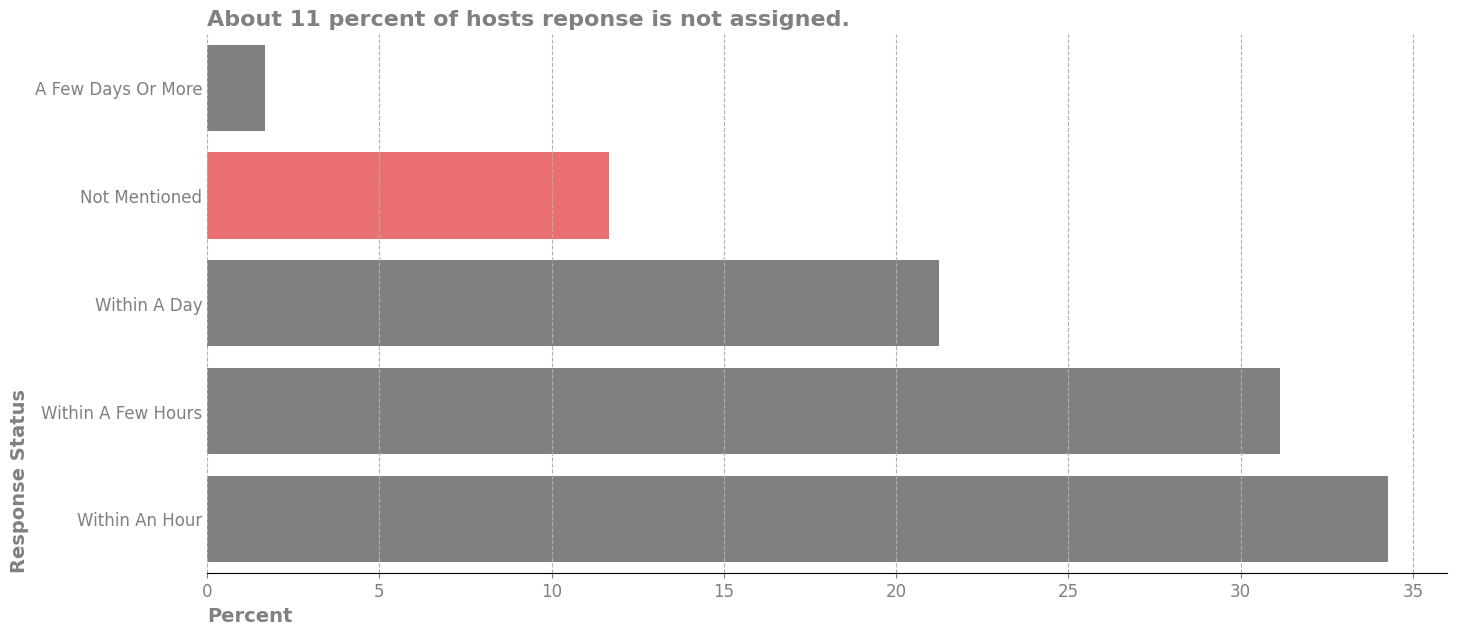

In [65]:
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(data=host_response_time, 
            y="host_response_time", 
            x="proportion", 
            hue = 'host_response_time',
            palette = list(host_response_time["host_response_color"].values),
            ax=ax)

ax.spines[["right", "left", "top"]].set_visible(False)

ax.set_title("About 11 percent of hosts reponse is not assigned."
             , loc="left"
             , weight="bold"
             , color="gray"
             , fontsize = 16)

ax.set_xlabel("Percent"
             , weight="bold"
             , color="gray"
             ,loc = "left"
             ,fontsize = 14)

ax.set_ylabel("Response Status"
              , weight = 'bold'
              , color = "gray"
              , loc = "bottom"
              , fontsize = 14)

ax.tick_params(axis="x", colors="gray", labelsize = "large")
ax.tick_params(axis="y", colors="gray", labelsize="large")
ax.tick_params(axis="y", which="major", length=0)

ax.grid(axis="x", linestyle="dashed")

ax.set_yticks(ticks=range(len(host_response_time["host_response_time"]))
              , labels=[response.title() for response in host_response_time["host_response_time"]])
plt.savefig("../data/figures/host_response_time_status.png", dpi=300)

plt.show()

In [66]:
airbnb_dataframe = airbnb_dataframe.assign(
    price=lambda df: df["price"]
    .str.replace("$","")
    .str.replace(".00", "")
    .str.replace(",","")
    .astype("float"))

In [67]:
airbnb_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3723 non-null   int64  
 1   host_response_time  3723 non-null   object 
 2   city                3723 non-null   object 
 3   latitude            3723 non-null   float64
 4   longitude           3723 non-null   float64
 5   beds                3712 non-null   float64
 6   price               3723 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 203.7+ KB


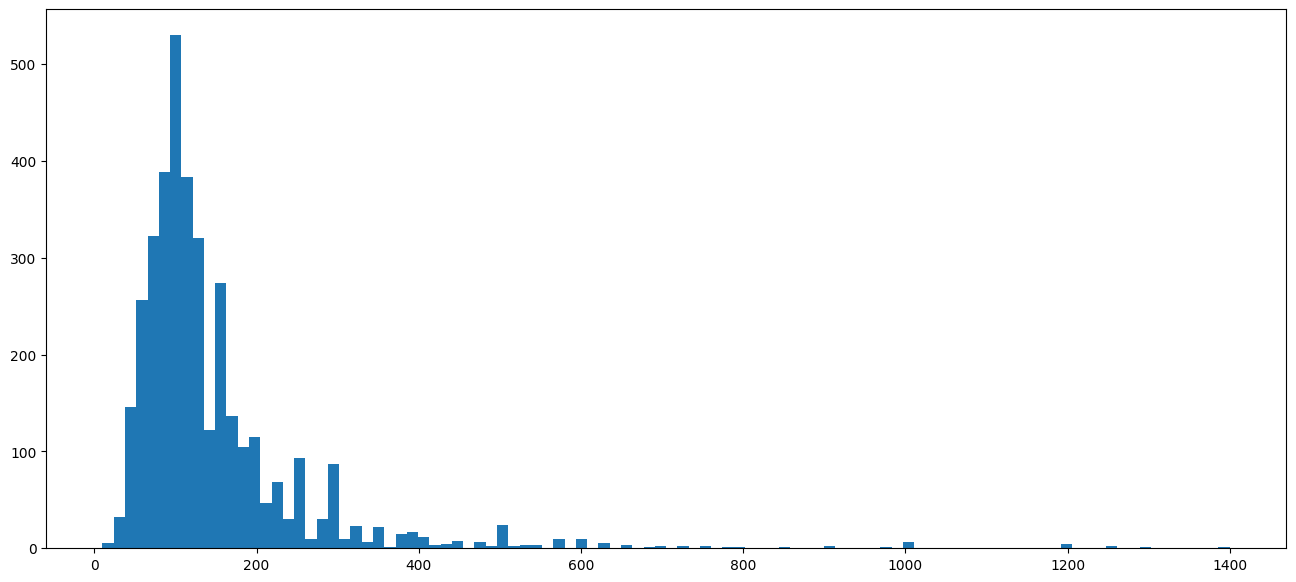

In [68]:
fig, ax = plt.subplots(figsize=(16,7))
plt.hist(airbnb_dataframe.query("price < 1500")["price"], bins = 100)

plt.show()

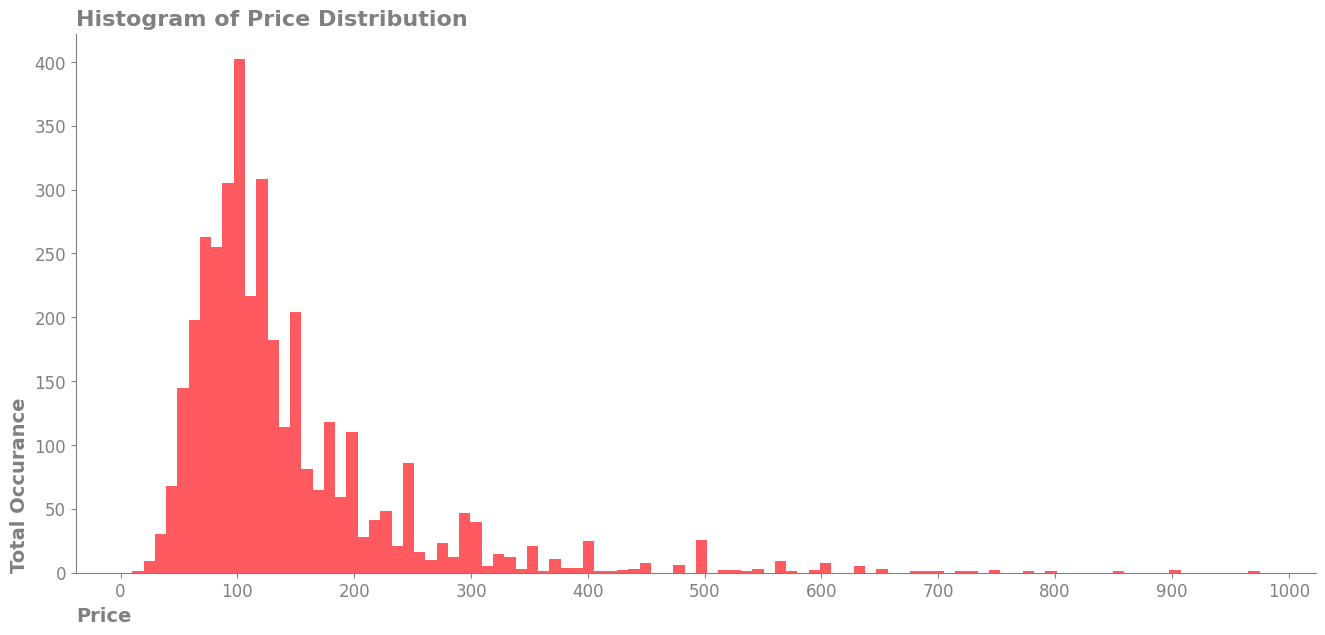

In [69]:
fig, ax = plt.subplots(figsize=(16,7))
ax.hist(airbnb_dataframe.query("price < 1000")["price"], 
         bins = 100,
         color='#FF5A5F')
ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")

custom_xticks = np.arange(0, 1001, 100)
ax.set_xticks(custom_xticks)

ax.set_title("Histogram of Price Distribution",
             loc = "left",
             weight="bold",
             color="gray",
             fontsize=16,)

ax.set_xlabel("Price",
              loc="left",
              weight="bold",
              color="gray",
              fontsize=14)

ax.set_ylabel("Total Occurance",
               loc="bottom",
              weight="bold",
              color="gray",
              fontsize=14)

ax.tick_params(axis="x", colors="gray", labelsize = "large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

plt.show()

In [70]:
airbnb_dataframe["price"].describe()

count    3723.000000
mean      149.165995
std       140.110699
min        10.000000
25%        85.000000
50%       115.000000
75%       165.000000
max      2822.000000
Name: price, dtype: float64

Bivariate Analysis

In [71]:
airbnb_dataframe

,id,host_response_time,city,latitude,longitude,beds,price
0,7087327,within a few hours,Washington,38.890046,-77.002808,2.0,160.0
1,975833,within a day,Washington,38.880413,-76.990485,3.0,350.0
2,8249488,within a day,Hyattsville,38.955291,-76.986006,1.0,50.0
3,8409022,within an hour,Washington,38.872134,-77.019639,1.0,95.0
4,8411173,within a few hours,Silver Spring,38.996382,-77.041541,1.0,50.0
...,...,...,...,...,...,...,...
3718,1544877,within a few hours,Washington,38.885492,-76.987765,2.0,135.0
3719,1806338,within an hour,Washington,38.889401,-76.986646,1.0,79.0
3720,1817907,within an hour,Washington,38.889533,-77.001010,3.0,275.0
3721,4223238,within a day,Washington,38.890815,-77.002283,1.0,179.0


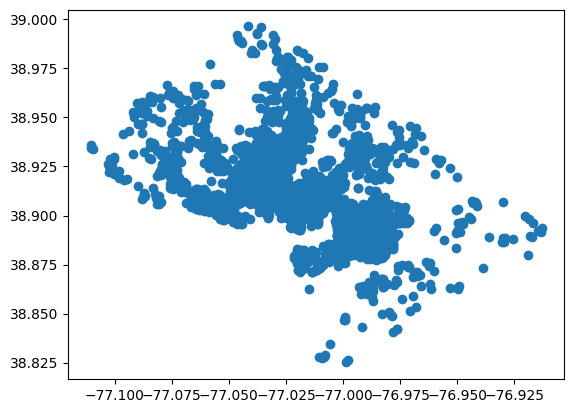

In [72]:
plt.scatter(x=airbnb_dataframe["longitude"], y=airbnb_dataframe["latitude"])

In [73]:
#airbnb_dataframe= airbnb_dataframe.assign(neighbourhood_color=lambda df:np.where( df["neighbourhood_group_cleansed"].eq("Manhattan"),"#FF5A5F", "#808080"))

In [74]:
airbnb_dataframe

,id,host_response_time,city,latitude,longitude,beds,price
0,7087327,within a few hours,Washington,38.890046,-77.002808,2.0,160.0
1,975833,within a day,Washington,38.880413,-76.990485,3.0,350.0
2,8249488,within a day,Hyattsville,38.955291,-76.986006,1.0,50.0
3,8409022,within an hour,Washington,38.872134,-77.019639,1.0,95.0
4,8411173,within a few hours,Silver Spring,38.996382,-77.041541,1.0,50.0
...,...,...,...,...,...,...,...
3718,1544877,within a few hours,Washington,38.885492,-76.987765,2.0,135.0
3719,1806338,within an hour,Washington,38.889401,-76.986646,1.0,79.0
3720,1817907,within an hour,Washington,38.889533,-77.001010,3.0,275.0
3721,4223238,within a day,Washington,38.890815,-77.002283,1.0,179.0


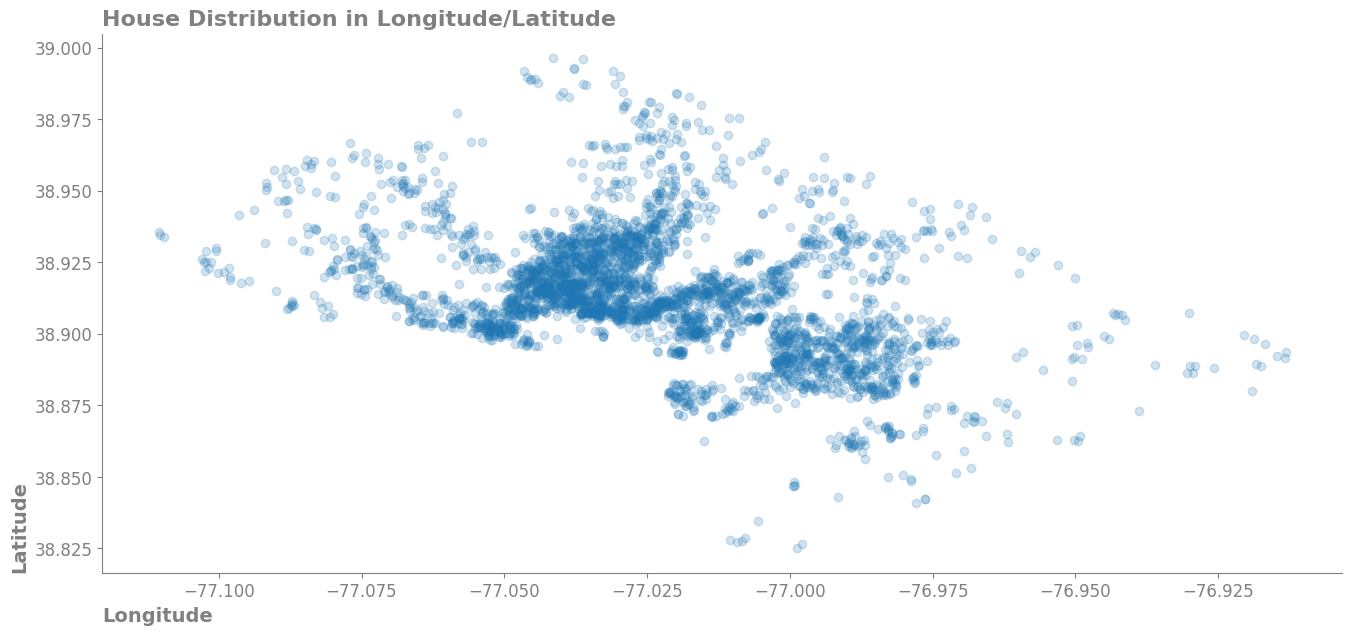

In [75]:
fig, ax = plt.subplots(figsize=(16,7))
ax.scatter(x=airbnb_dataframe["longitude"], y=airbnb_dataframe["latitude"],
             alpha = 0.2)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")

ax.set_title("House Distribution in Longitude/Latitude",
             loc = "left",
             weight="bold",
             color="gray",
             fontsize=16,)

ax.set_xlabel("Longitude",
              loc="left",
              weight="bold",
              color="gray",
              fontsize=14)

ax.set_ylabel("Latitude",
               loc="bottom",
              weight="bold",
              color="gray",
              fontsize=14)

ax.tick_params(axis="x", colors="gray", labelsize = "large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

plt.show()

In [76]:
if 'neighbourhood' in airbnb_dataframe.columns:
    print("\n'neighbourhood' column unique values:")
    print(airbnb_dataframe['neighbourhood'].value_counts(dropna=False))
    print(f"Missing values in 'neighbourhood': {airbnb_dataframe['neighbourhood'].isnull().sum()}")


In [77]:
#print(airbnb_dataframe["neighbourhood"])

In [78]:
neighbourhood_beds_dataframe = pd.pivot_table(data=airbnb_dataframe, index="host_response_time", columns="beds", values="price", aggfunc="mean", fill_value=0)

In [79]:
from matplotlib.colors import ListedColormap

In [80]:
colors= ["#808080", "#808080", "#FF5A5F", "#808080", "#808080"]
airbnb_colormap = ListedColormap(colors=colors, name="airbnb_colormap")

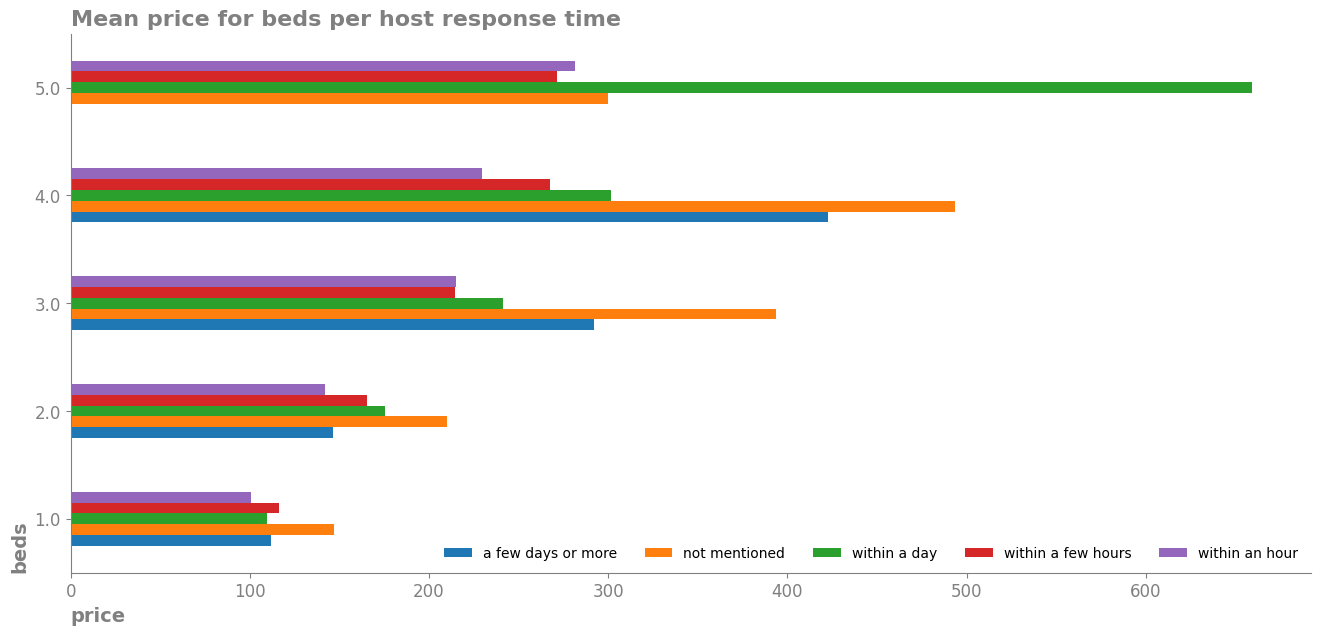

In [81]:
fig, ax = plt.subplots(figsize=(16,7))
neighbourhood_beds_dataframe.loc[:, :5].T.plot(kind='barh', ax=ax)

ax.spines[["right", "top"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")

ax.set_title("Mean price for beds per host response time",
             loc = "left",
             weight="bold",
             color="gray",
             fontsize=16,)

ax.set_xlabel("price",
              loc="left",
              weight="bold",
              color="gray",
              fontsize=14)

ax.set_ylabel("beds",
               loc="bottom",
              weight="bold",
              color="gray",
              fontsize=14)

ax.tick_params(axis="x", colors="gray", labelsize = "large")
ax.tick_params(axis="y", colors="gray", labelsize="large")

plt.legend(ncol= 5, loc="lower right", frameon=False)

plt.show()

In [82]:
airbnb_dataframe.groupby(["host_response_time", "price"], as_index=False).agg(total_response=("id", "count"))

,host_response_time,price,total_response
0,a few days or more,45.0,1
1,a few days or more,48.0,1
2,a few days or more,60.0,1
3,a few days or more,64.0,1
4,a few days or more,65.0,4
...,...,...,...
691,within an hour,679.0,1
692,within an hour,695.0,1
693,within an hour,720.0,1
694,within an hour,725.0,1


In [83]:
airbnb_dataframe.groupby(["host_response_time", "price"], as_index=False).agg({"id": "count"}).rename(columns={"id": "total_response"})

,host_response_time,price,total_response
0,a few days or more,45.0,1
1,a few days or more,48.0,1
2,a few days or more,60.0,1
3,a few days or more,64.0,1
4,a few days or more,65.0,4
...,...,...,...
691,within an hour,679.0,1
692,within an hour,695.0,1
693,within an hour,720.0,1
694,within an hour,725.0,1


In [84]:
pd.pivot_table(data=airbnb_dataframe, index="host_response_time", columns="price", values="id", aggfunc="count")

price,10.0,20.0,23.0,25.0,28.0,30.0,31.0,32.0,33.0,34.0,...,900.0,975.0,1000.0,1200.0,1250.0,1300.0,1400.0,1500.0,2000.0,2822.0
host_response_time,,,,,,,,,,,,,,,,,,,,,
a few days or more,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
not mentioned,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,2.0,NaN,4.0,2.0,NaN,1.0,1.0,NaN,3.0,NaN
within a day,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0
within a few hours,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,NaN,3.0,...,NaN,1.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN
within an hour,NaN,2.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
airbnb_dataframe["city"]=airbnb_dataframe["city"].fillna("Unknown City")
airbnb_dataframe["host_response_time"]=airbnb_dataframe["host_response_time"].fillna("Not Specified")
airbnb_dataframe["beds"]=airbnb_dataframe["beds"].fillna(0, inplace=True)

if (airbnb_dataframe["beds"].dropna() % 1 != 0). any():
    airbnb_dataframe["beds"] = airbnb_dataframe["beds"].fillna(0, inplace=True)
  
   
airbnb_dataframe["price"]=airbnb_dataframe["price"].fillna(airbnb_dataframe["price"].median())
airbnb_dataframe["latitude"] = airbnb_dataframe["latitude"].fillna(airbnb_dataframe["latitude"].median())
airbnb_dataframe["longitude"] = airbnb_dataframe["longitude"].fillna(airbnb_dataframe["longitude"].median())


filtered_df = airbnb_dataframe.query("host_response_time != 'Not Specified' and host_response_time != 'not mentioned'")

crosstab_table = pd.crosstab(
    index=filtered_df["city"],
    columns=filtered_df["host_response_time"],
    values=filtered_df["id"],
    aggfunc="count",
    normalize="index",
)

crosstab_table_filled = crosstab_table.fillna(0, inplace=True)


print("Original Crosstab Table (potentially with NaNs):")
print(crosstab_table)

#print("\nCrosstab Table with NaNs filled with 0, inplace=True (and dtypes converted to int):")
#print(crosstab_table_filled)
#print("\nData Types of the filled crosstab table:")


Original Crosstab Table (potentially with NaNs):
host_response_time               a few days or more  within a day  \
city                                                                
Annapolis                                  0.000000      0.000000   
Arlington                                  0.000000      0.000000   
Capitol Heights                            0.000000      0.000000   
Capitol Hill, Washington                   0.000000      0.000000   
Columbia Heights, middle of DC!            0.000000      1.000000   
Dupont Circle                              0.000000      0.000000   
Hyattsville                                0.000000      0.500000   
Mount Rainier                              0.000000      0.000000   
Silver Spring                              0.000000      0.333333   
Takoma Park                                0.000000      0.000000   
Washington                                 0.019614      0.242528   
Washington                                 0.000000   

C:\Users\Parsan Afzar\AppData\Local\Temp\ipykernel_7720\3394330349.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_dataframe["beds"]=airbnb_dataframe["beds"].fillna(0, inplace=True)
C:\Users\Parsan Afzar\AppData\Local\Temp\ipykernel_7720\3394330349.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

In [95]:
pd.crosstab(
    index=airbnb_dataframe.query("host_response_time != 'not mentioned'")["city"],
    columns=airbnb_dataframe.query("host_response_time != 'not mentioned'")["host_response_time"],
    values=airbnb_dataframe.query("host_response_time != 'not mentioned'")["id"],
    aggfunc="count",
)

host_response_time,a few days or more,within a day,within a few hours,within an hour
city,,,,
Annapolis,NaN,NaN,1.0,NaN
Arlington,NaN,NaN,1.0,NaN
Capitol Heights,NaN,NaN,NaN,1.0
"Capitol Hill, Washington",NaN,NaN,1.0,NaN
"Columbia Heights, middle of DC!",NaN,1.0,NaN,NaN
Dupont Circle,NaN,NaN,1.0,NaN
Hyattsville,NaN,1.0,NaN,1.0
Mount Rainier,NaN,NaN,2.0,3.0
Silver Spring,NaN,2.0,2.0,2.0


<Axes: xlabel='host_response_time'>

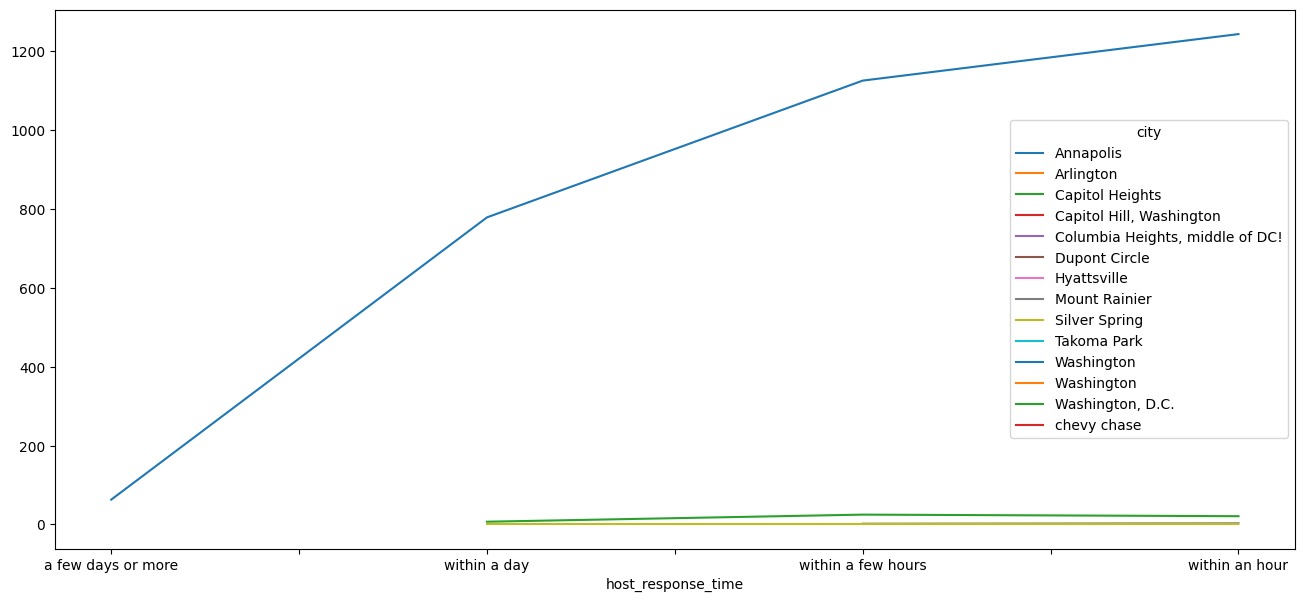

In [109]:
fig, ax = plt.subplots(figsize=(16,7))
crosstab_table.transpose().plot(ax=ax)

C:\Users\Parsan Afzar\AppData\Local\Temp\ipykernel_7720\3877387363.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  airbnb_dataframe["price"] = airbnb_dataframe["price"].fillna(airbnb_dataframe["price"].median())


--- Crosstab Table filled with Median ---
host_response_time               a few days or more  within a day  \
city                                                                
Annapolis                                      63.0           1.5   
Arlington                                      63.0           1.5   
Capitol Heights                                63.0           1.5   
Capitol Hill, Washington                       63.0           1.5   
Columbia Heights, middle of DC!                63.0           1.0   
Dupont Circle                                  63.0           1.5   
Hyattsville                                    63.0           1.0   
Mount Rainier                                  63.0           1.5   
Silver Spring                                  63.0           2.0   
Takoma Park                                    63.0           1.5   
Washington                                     63.0         779.0   
Washington                                     63.0          

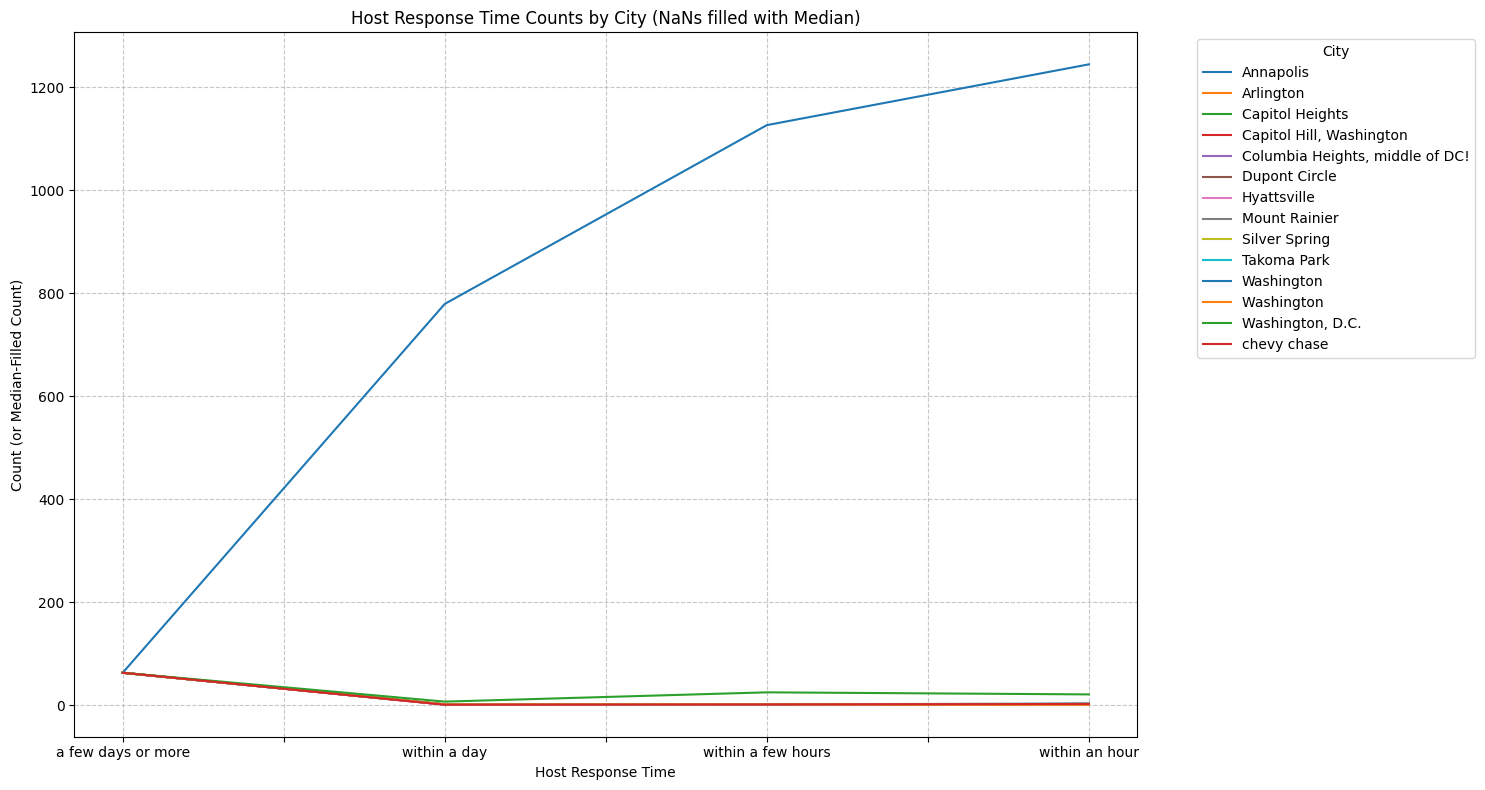

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


useful_columns = [
    "id",
    "host_response_time",
    "city",
    "latitude",
    "longitude",
    "beds",
    "price", 
]

airbnb_dataframe = pd.read_csv(
    "../data/input/listings.csv.gz",
    usecols=useful_columns,
    dtype={
        'city': str,
        'host_response_time': str
    }
)

airbnb_dataframe.loc[:, 'price'] = airbnb_dataframe['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
airbnb_dataframe.loc[:, 'price'] = pd.to_numeric(airbnb_dataframe['price'], errors='coerce') 


airbnb_dataframe["city"] = airbnb_dataframe["city"].fillna("Unknown City")
airbnb_dataframe["host_response_time"] = airbnb_dataframe["host_response_time"].fillna("Not Specified")

airbnb_dataframe["beds"] = airbnb_dataframe["beds"].fillna(0)
if not (airbnb_dataframe["beds"].dropna() % 1 != 0).any():
    airbnb_dataframe["beds"] = airbnb_dataframe["beds"].astype(int)

airbnb_dataframe["price"] = airbnb_dataframe["price"].fillna(airbnb_dataframe["price"].median())

airbnb_dataframe["latitude"] = airbnb_dataframe["latitude"].fillna(airbnb_dataframe["latitude"].median())
airbnb_dataframe["longitude"] = airbnb_dataframe["longitude"].fillna(airbnb_dataframe["longitude"].median())


filtered_df_for_crosstab = airbnb_dataframe.query(
    "host_response_time != 'not mentioned' and host_response_time != 'Not Specified'"
)

crosstab_table = pd.crosstab(
    index=filtered_df_for_crosstab["city"],
    columns=filtered_df_for_crosstab["host_response_time"],
    values=filtered_df_for_crosstab["id"],
    aggfunc="count",
)

crosstab_table_filled_median = crosstab_table.fillna(crosstab_table.median())

print("--- Crosstab Table filled with Median ---")
print(crosstab_table_filled_median)
print("\n--- Data Types of the median-filled crosstab table columns ---")
print(crosstab_table_filled_median.dtypes)


plt.figure(figsize=(15, 8))
crosstab_table_filled_median.T.plot(kind='line', figsize=(15, 8), ax=plt.gca()) 
plt.title('Host Response Time Counts by City (NaNs filled with Median)')
plt.xlabel('Host Response Time')
plt.ylabel('Count (or Median-Filled Count)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

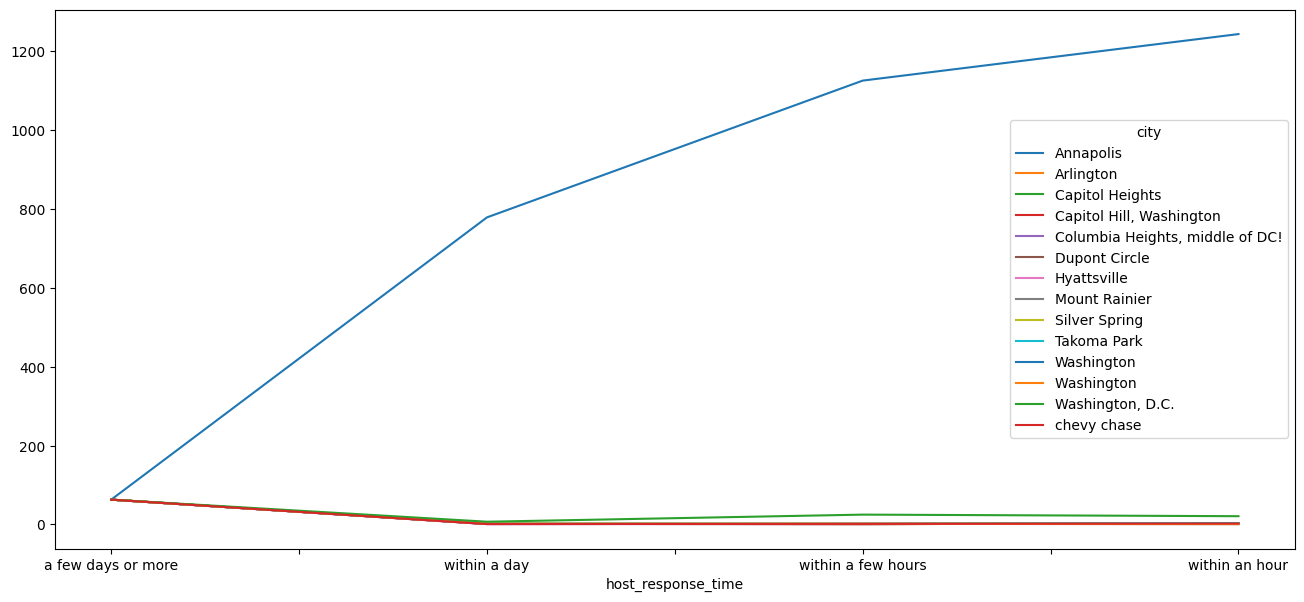

In [113]:
crosstab_table_filled_median.T.plot(kind='line', figsize=(16, 7), ax=plt.gca()) 

plt.show()